In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 

parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'd23528a9684141dfadc1b393e0d78196',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)

except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [2]:
type(data)

dict

In [3]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,12488,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.995487e+07,1.995487e+07,False,1.849114e+12,NaN,1,NaN,NaN,None,2025-11-28T15:22:00.000Z,92664.780274,5.391505e+10,-24.5953,0.209466,2.001342,10.496866,-17.583117,-18.748562,-14.782510,1.849114e+12,58.8831,1.945960e+12,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840
1,1027,Ethereum,ETH,ethereum,11210,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206955e+08,1.206955e+08,True,3.718182e+11,NaN,2,NaN,NaN,None,2025-11-28T15:22:00.000Z,3080.629384,1.774307e+10,-16.8101,0.139214,2.602455,12.752977,-22.579144,-26.397688,-29.571944,3.718182e+11,11.8402,3.718182e+11,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840
2,825,Tether USDt,USDT,tether,160169,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.845668e+11,1.868680e+11,True,1.869210e+11,NaN,3,NaN,NaN,None,2025-11-28T15:22:00.000Z,1.000283,8.310108e+10,-21.6233,0.021703,0.034428,0.076926,0.022010,-0.030824,0.017136,1.846190e+11,5.8790,1.869210e+11,None,2025-11-28T15:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-28 15:24:29.383840
3,52,XRP,XRP,xrp,1762,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.033164e+10,9.998575e+10,False,2.244003e+11,NaN,4,NaN,NaN,None,2025-11-28T15:22:00.000Z,2.244323,3.403409e+09,-4.7867,1.193505,2.475121,16.389577,-15.231642,-22.425260,-19.916758,1.354036e+11,4.3118,2.244323e+11,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840
4,1839,BNB,BNB,bnb,2977,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377364e+08,1.377364e+08,1.377364e+08,False,1.239502e+11,NaN,5,NaN,NaN,None,2025-11-28T15:23:00.000Z,899.909029,1.789994e+09,-16.8284,0.293593,1.005060,9.766833,-18.727895,-11.272269,4.869162,1.239502e+11,3.9341,1.239502e+11,None,2025-11-28T15:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840
5,5426,Solana,SOL,solana,1054,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.594069e+08,6.149322e+08,True,8.786291e+10,NaN,6,5.252369e+08,7.504705e+10,None,2025-11-28T15:22:00.000Z,142.882281,4.068738e+09,-14.3802,0.241019,0.956676,12.619414,-28.438387,-32.551231,-28.704823,7.992933e+10,2.5453,8.786291e+10,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840
6,3408,USDC,USDC,usd-coin,34949,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.607720e+10,7.607720e+10,False,7.607988e+10,NaN,7,6.090122e+10,6.090337e+10,None,2025-11-28T15:22:00.000Z,1.000035,1.084787e+10,-21.0476,0.002761,-0.002546,-0.020561,0.020964,0.007620,-0.002337,7.607988e+10,2.4227,7.607988e+10,None,2025-11-28T15:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-28 15:24:29.383840
7,1958,TRON,TRX,tron,1262,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.467814e+10,9.467815e+10,True,2.654238e+10,NaN,8,9.466789e+10,2.653950e+10,None,2025-11-28T15:22:00.000Z,0.280343,5.546609e+08,11.7354,0.094500,0.826558,1.328949,-5.525302,-16.451256,-17.090647,2.654237e+10,0.8452,2.654238e+10,None,202

In [5]:
print(data)
print(data.keys())

{'status': {'timestamp': '2025-11-28T15:24:23.972Z', 'error_code': 0, 'error_message': None, 'elapsed': 35, 'credit_count': 1, 'notice': None, 'total_count': 9121}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 12488, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [6]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'd23528a9684141dfadc1b393e0d78196',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)


In [7]:
df2 = pd.json_normalize(data['data'])
df2['Timestamp'] = pd.to_datetime('now')
df = pd.concat([df, df2], ignore_index=True)

In [8]:
import os 
from time import time
from time import sleep

for i in range(33):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [18]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,12488,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.995487e+07,1.995487e+07,False,1.849114e+12,NaN,1,NaN,NaN,None,2025-11-28T15:22:00.000Z,92664.780274,5.391505e+10,-24.5953,0.209466,2.001342,10.496866,-17.583117,-18.748562,-14.782510,1.849114e+12,58.8831,1.945960e+12,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840,NaT
1,1027,Ethereum,ETH,ethereum,11210,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.206955e+08,1.206955e+08,True,3.718182e+11,NaN,2,NaN,NaN,None,2025-11-28T15:22:00.000Z,3080.629384,1.774307e+10,-16.8101,0.139214,2.602455,12.752977,-22.579144,-26.397688,-29.571944,3.718182e+11,11.8402,3.718182e+11,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840,NaT
2,825,Tether USDt,USDT,tether,160169,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,1.845668e+11,1.868680e+11,True,1.869210e+11,NaN,3,NaN,NaN,None,2025-11-28T15:22:00.000Z,1.000283,8.310108e+10,-21.6233,0.021703,0.034428,0.076926,0.022010,-0.030824,0.017136,1.846190e+11,5.8790,1.869210e+11,None,2025-11-28T15:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-28 15:24:29.383840,NaT
3,52,XRP,XRP,xrp,1762,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,6.033164e+10,9.998575e+10,False,2.244003e+11,NaN,4,NaN,NaN,None,2025-11-28T15:22:00.000Z,2.244323,3.403409e+09,-4.7867,1.193505,2.475121,16.389577,-15.231642,-22.425260,-19.916758,1.354036e+11,4.3118,2.244323e+11,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840,NaT
4,1839,BNB,BNB,bnb,2977,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.377364e+08,1.377364e+08,1.377364e+08,False,1.239502e+11,NaN,5,NaN,NaN,None,2025-11-28T15:23:00.000Z,899.909029,1.789994e+09,-16.8284,0.293593,1.005060,9.766833,-18.727895,-11.272269,4.869162,1.239502e+11,3.9341,1.239502e+11,None,2025-11-28T15:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840,NaT
5,5426,Solana,SOL,solana,1054,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,5.594069e+08,6.149322e+08,True,8.786291e+10,NaN,6,5.252369e+08,7.504705e+10,None,2025-11-28T15:22:00.000Z,142.882281,4.068738e+09,-14.3802,0.241019,0.956676,12.619414,-28.438387,-32.551231,-28.704823,7.992933e+10,2.5453,8.786291e+10,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840,NaT
6,3408,USDC,USDC,usd-coin,34949,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,7.607720e+10,7.607720e+10,False,7.607988e+10,NaN,7,6.090122e+10,6.090337e+10,None,2025-11-28T15:22:00.000Z,1.000035,1.084787e+10,-21.0476,0.002761,-0.002546,-0.020561,0.020964,0.007620,-0.002337,7.607988e+10,2.4227,7.607988e+10,None,2025-11-28T15:22:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-28 15:24:29.383840,NaT
7,1958,TRON,TRX,tron,1262,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,9.467814e+10,9.467815e+10,True,2.654238e+10,NaN,8,9.466789e+10,2.653950e+10,None,2025-11-28T15:22:00.000Z,0.280343,5.546609e+08,11.7354,0.094500,0.826558,1.328949,-5.525302,-16.451256,-17.090647,2.6

In [20]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,minted_market_cap,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,12488,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19954871.00000,19954871.00000,False,1849113736612.37988,NaN,1,NaN,NaN,None,2025-11-28T15:22:00.000Z,92664.78027,53915050735.65495,-24.59530,0.20947,2.00134,10.49687,-17.58312,-18.74856,-14.78251,1849113736612.37524,58.88310,1945960385755.42993,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840,NaT
1,1027,Ethereum,ETH,ethereum,11210,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120695537.41520,120695537.41520,True,371818219039.77002,NaN,2,NaN,NaN,None,2025-11-28T15:22:00.000Z,3080.62938,17743074860.21566,-16.81010,0.13921,2.60246,12.75298,-22.57914,-26.39769,-29.57194,371818219039.76562,11.84020,371818219039.77002,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840,NaT
2,825,Tether USDt,USDT,tether,160169,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, usd-stab...",NaN,184566777749.50497,186868037066.16458,True,186920958142.67999,NaN,3,NaN,NaN,None,2025-11-28T15:22:00.000Z,1.00028,83101081774.29156,-21.62330,0.02170,0.03443,0.07693,0.02201,-0.03082,0.01714,184619047108.79025,5.87900,186920958142.67999,None,2025-11-28T15:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-11-28 15:24:29.383840,NaT
3,52,XRP,XRP,xrp,1762,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,60331635327.00000,99985752852.00000,False,224400278578.63000,NaN,4,NaN,NaN,None,2025-11-28T15:22:00.000Z,2.24432,3403409283.11305,-4.78670,1.19350,2.47512,16.38958,-15.23164,-22.42526,-19.91676,135403648903.08603,4.31180,224432253773.98001,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840,NaT
4,1839,BNB,BNB,bnb,2977,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",137736396.99000,137736396.99000,137736396.99000,False,123950227342.10001,NaN,5,NaN,NaN,None,2025-11-28T15:23:00.000Z,899.90903,1789993717.35626,-16.82840,0.29359,1.00506,9.76683,-18.72790,-11.27227,4.86916,123950227342.09691,3.93410,123950227342.10001,None,2025-11-28T15:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840,NaT
5,5426,Solana,SOL,solana,1054,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,559406859.64631,614932192.37977,True,87862914241.88000,NaN,6,525236893.30000,75047045323.96033,None,2025-11-28T15:22:00.000Z,142.88228,4068738443.04724,-14.38020,0.24102,0.95668,12.61941,-28.43839,-32.55123,-28.70482,79929328053.56506,2.54530,87862914241.88000,None,2025-11-28T15:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-11-28 15:24:29.383840,NaT
6,3408,USDC,USDC,usd-coin,34949,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,76077196635.05618,76077196635.05618,False,76079877871.91000,NaN,7,60901219650.23000,60903366030.50748,None,2025-11-28T15:22:00.000Z,1.00004,10847867694.18904,-21.04760,0.00276,-0.00255,-0.02056,0.02096,0.00762,-0.00234,76079877871.90761,2.42270,76079877871.91000,None,2025-11-28T15:22:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-11-28 15:24:29.383840,NaT
7,1958,TRON,TRX,tron,1262,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1,

In [24]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.20947,2.00134,10.49687,-17.58312,-18.74856,-14.78251
Ethereum,0.13921,2.60246,12.75298,-22.57914,-26.39769,-29.57194
Tether USDt,0.02170,0.03443,0.07693,0.02201,-0.03082,0.01714
XRP,1.19350,2.47512,16.38958,-15.23164,-22.42526,-19.91676
BNB,0.29359,1.00506,9.76683,-18.72790,-11.27227,4.86916
Solana,0.24102,0.95668,12.61941,-28.43839,-32.55123,-28.70482
USDC,0.00276,-0.00255,-0.02056,0.02096,0.00762,-0.00234
TRON,0.09450,0.82656,1.32895,-5.52530,-16.45126,-17.09065
Dogecoin,0.92391,0.79491,10.46155,-20.20293,-34.40531,-28.51791


In [26]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.20947
              quote.USD.percent_change_24h     2.00134
              quote.USD.percent_change_7d     10.49687
              quote.USD.percent_change_30d   -17.58312
              quote.USD.percent_change_60d   -18.74856
              quote.USD.percent_change_90d   -14.78251
Ethereum      quote.USD.percent_change_1h      0.13921
              quote.USD.percent_change_24h     2.60246
              quote.USD.percent_change_7d     12.75298
              quote.USD.percent_change_30d   -22.57914
              quote.USD.percent_change_60d   -26.39769
              quote.USD.percent_change_90d   -29.57194
Tether USDt   quote.USD.percent_change_1h      0.02170
              quote.USD.percent_change_24h     0.03443
              quote.USD.percent_change_7d      0.07693
              quote.USD.percent_change_30d     0.02201
              quote.USD.percent_change_60d    -0.03082
              quote.US

In [28]:
type(df4)

pandas.core.series.Series

In [30]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.20947
             quote.USD.percent_change_24h   2.00134
             quote.USD.percent_change_7d   10.49687
             quote.USD.percent_change_30d -17.58312
             quote.USD.percent_change_60d -18.74856
             quote.USD.percent_change_90d -14.78251
Ethereum     quote.USD.percent_change_1h    0.13921
             quote.USD.percent_change_24h   2.60246
             quote.USD.percent_change_7d   12.75298
             quote.USD.percent_change_30d -22.57914
             quote.USD.percent_change_60d -26.39769
             quote.USD.percent_change_90d -29.57194
Tether USDt  quote.USD.percent_change_1h    0.02170
             quote.USD.percent_change_24h   0.03443
             quote.USD.percent_change_7d    0.07693
             quote.USD.percent_change_30d   0.02201
             quote.USD.percent_change_60d  -0.03082
             quote.USD.percent_change_90d   0.01714
XRP          quote.USD.percent_change_1h    1.19350
             quote.USD.percent_change_24h   2.47512
             quote.USD.percent_change_7d   16.38958
             quote.USD.percent_change_30d -15.23164
             quote.USD.percent_change_60d -22.42526
             quote.USD.percent_change_90d -19.91676
BNB          quote.USD.percent_change_1h    0.29359
             quote.USD.percent_change_24h   1.00506
             quote.USD.percent_change_7d    9.76683
             quote.USD.percent_change_30d -18.72790
             quote.USD.percent_change_60d -11.27227
             quote.USD.percent_change_90d   4.86916
Solana       quote.USD.percent_change_1h    0.24102
             quote.USD.percent_change_24h   0.95668
             quote.USD.percent_change_7d   12.61941
             quote.USD.percent_change_30d -28.43839
             quote.USD.percent_change_60d -32.55123
             quote.USD.percent_change_90d -28.70482
USDC         quote.USD.percent_change_1h    0.00276
             quote.USD.percent_change_24h  -0.00255
             quote.USD.percent_change_7d   -0.02056
             quote.USD.percent_change_30d   0.02096
             quote.USD.percent_change_60d   0.00762
             quote.USD.percent_change_90d  -0.00234
TRON         quote.USD.percent_change_1h    0.09450
             quote.USD.percent_change_24h   0.82656
             quote.USD.percent_change_7d    1.32895
             quote.USD.percent_change_30d  -5.52530
             quote.USD.percent_change_60d -16.45126
             quote.USD.percent_change_90d -17.09065
Dogecoin     quote.USD.percent_change_1h    0.92391
             quote.USD.percent_change_24h   0.79491
             quote.USD.percent_change_7d   10.46155
             quote.USD.percent_change_30d -20.20293
             quote.USD.percent_change_60d -34.40531
             quote.USD.percent_change_90d -28.51791
Cardano      quote.USD.percent_change_1h    0.12562
             quote.USD.percent_change_24h   0.37201
             quote.USD.percent_change_7d    6.38960
             quote.USD.percent_change_30d -33.15644
             quote.USD.percent_change_60d -46.51764
             quote.USD.percent_change_90d -47.34760
Hyperliquid  quote.USD.percent_change_1h   -1.06826
             quote.USD.percent_change_24h   4.22525
             quote.USD.percent_change_7d    8.93645
             quote.USD.percent_change_30d -23.75856
             quote.USD.percent_change_60d -23.65653
             quote.USD.percent_change_90d -17.58416
Bitcoin Cash quote.USD.percent_change_1h    0.08614
             quote.USD.percent_change_24h   0.92420
             quote.USD.percent_change_7d    8.95860
             quote.USD.percent_change_30d  -3.66022
             quote.USD.percent_change_60d  -3.38745
             quote.USD.percent_change_90d  -0.67821
Chainlink    quote.USD.percent_change_1h   -0.04044
             quote.USD.percent_change_24h   0.40560
             quote.USD.percent_change_7d   11.41846
             quote.USD.percent_change_30d

In [32]:
df5.count()

values    90
dtype: int64

In [34]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.20947
1,Bitcoin,quote.USD.percent_change_24h,2.00134
2,Bitcoin,quote.USD.percent_change_7d,10.49687
3,Bitcoin,quote.USD.percent_change_30d,-17.58312
4,Bitcoin,quote.USD.percent_change_60d,-18.74856
5,Bitcoin,quote.USD.percent_change_90d,-14.78251
6,Ethereum,quote.USD.percent_change_1h,0.13921
7,Ethereum,quote.USD.percent_change_24h,2.60246
8,Ethereum,quote.USD.percent_change_7d,12.75298
9,Ethereum,quote.USD.percent_change_30d,-22.57914


In [36]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7


,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.20947
1,Bitcoin,quote.USD.percent_change_24h,2.00134
2,Bitcoin,quote.USD.percent_change_7d,10.49687
3,Bitcoin,quote.USD.percent_change_30d,-17.58312
4,Bitcoin,quote.USD.percent_change_60d,-18.74856
5,Bitcoin,quote.USD.percent_change_90d,-14.78251
6,Ethereum,quote.USD.percent_change_1h,0.13921
7,Ethereum,quote.USD.percent_change_24h,2.60246
8,Ethereum,quote.USD.percent_change_7d,12.75298
9,Ethereum,quote.USD.percent_change_30d,-22.57914


In [38]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d', 'quote.USD.percent_change_1h'],['24h','7d','30d','60d','90d','1h'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.20947
1,Bitcoin,24h,2.00134
2,Bitcoin,7d,10.49687
3,Bitcoin,30d,-17.58312
4,Bitcoin,60d,-18.74856
5,Bitcoin,90d,-14.78251
6,Ethereum,1h,0.13921
7,Ethereum,24h,2.60246
8,Ethereum,7d,12.75298
9,Ethereum,30d,-22.57914


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

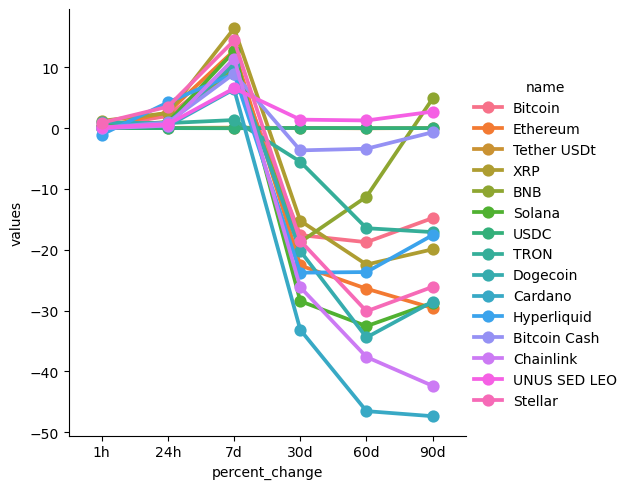

In [42]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [50]:
df10 = df7.query("name == 'Bitcoin'")
df10

,name,percent_change,values
0,Bitcoin,1h,0.20947
1,Bitcoin,24h,2.00134
2,Bitcoin,7d,10.49687
3,Bitcoin,30d,-17.58312
4,Bitcoin,60d,-18.74856
5,Bitcoin,90d,-14.78251


<Axes: xlabel='values', ylabel='percent_change'>

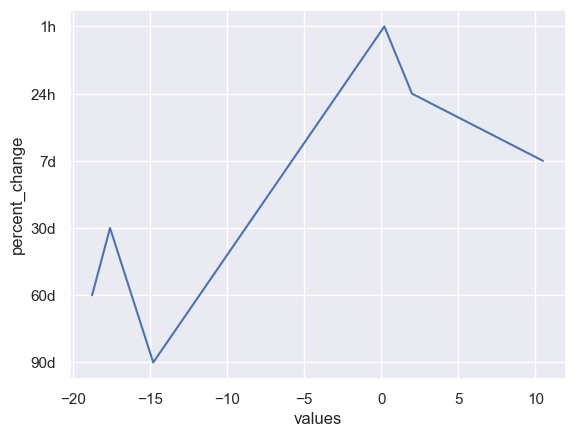

In [60]:
sns.lineplot(x='values', y='percent_change', data = df10)